In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
np.set_printoptions(precision=2) #set the precision of numpy array

In [2]:
# load the dataset
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
X_features = ['size(sqft)','bedrooms','floors','age']

In [3]:
print(f'Numbers of affecting elements: {X_train.shape[1]} || Numbers of data: {X_train.shape[0]}')
print(X_train)

Numbers of affecting elements: 4 || Numbers of data: 3
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]


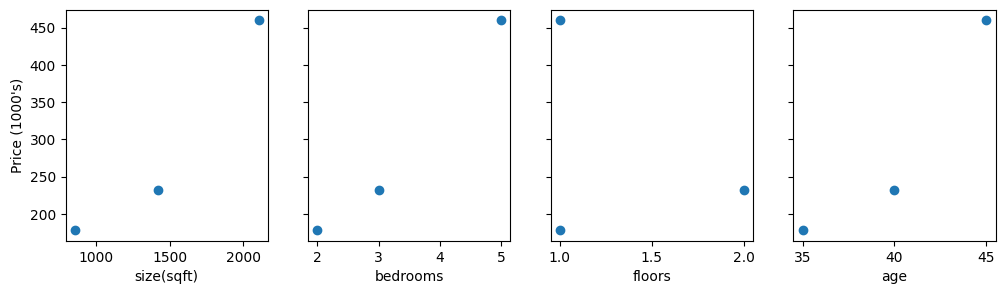

In [4]:
# pyplot.subplot: vẽ đồ thị (số hàng, số cột, figsize = (dài, cao), ...)
# co the lay tham so cua pyplot.figture. vd: figsize = ...
# return figture, axes. axes la 1 object dong goi tat ca cac element cua tung do thi 
fig,ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    # axes.scatter(x, y, ...) x, y: data position.
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

<div style="font-size: 20px; color: yellow">
    So sanh viec su dung vector va khong su dung vector
    <br></br>
</div>
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

In [5]:
# khoi tao 2 gia tri bat ky cho w, b
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [6]:
# predict su dung vong lap
def loop_calculator(x, w, b):
    p = 0
    for i in range (w.shape[0]):
        p_i = w[i] * x[i]
        p = p + p_i 
    p = p + b 
    return p

In [7]:
x_vec = X_train[0,:]
print("Predict for first data line:", loop_calculator(x_vec, w_init, b_init))

Predict for first data line: 459.9999976194083


In [8]:
# predict su dung vector
def vector_calculator(X, w, b):
    return np.dot(X, w) + b

In [9]:
print("Predict for first data line:", vector_calculator(x_vec, w_init, b_init))

Predict for first data line: 459.9999976194083


<div style="font-size: 20px; color: yellow">
    Tinh toan lost voi nhieu parameter
    <br></br>
</div>

<a name="toc_15456_4"></a>
Ham lost function $J(\mathbf{w},b)$ :
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


Chu y, $\mathbf{w}$ va $\mathbf{x}^{(i)}$ la cac vector

In [10]:
# tinh toan lost function
def compute_lost(X, y, w, b):
    lost = 0
    for i in range (X.shape[0]):
        lost_i = (np.dot(X[i],w) + b - y[i])**2
        lost = lost + lost_i
    return lost / (X.shape[0]*2)

In [11]:
# tinh toan tren data set
print("Tong lost cua model voi w_init va b_init: ", compute_lost(X_train, y_train, w_init, b_init))

Tong lost cua model voi w_init va b_init:  1.5578904428966628e-12


<div style="font-size: 20px; color: yellow">
    Gradient descendant voi nhieu bien
    <br></br>
</div>

<a name="toc_15456_5"></a>
Gradient descent voi nhieu variables:

$$\begin{align*} \text{lap lai}&\text{ toi khi hoi tu (convergence):} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

n la so luong features, parameters $w_j$,  $b$, duoc update simultaneously, va 

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m la so luong mau trong data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [12]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros(n,)
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i][j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [13]:
# tinh toan tren tap data
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]
dj_dw at initial w,b: 
 -1.6739251501955248e-06


In [23]:
# thuat toan gradient descent de tim tham so ma tai do ham so dat local minimum
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        J_history.append( compute_lost(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters /10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [32]:
# initialize parameters
initial_w = np.zeros_like(w_init)
# initial_w = [1, 1, 1, 1]
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 9.9e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 91474.10   
Iteration 1000: Cost 21282352120504994775583073125463703771098628782498011543806362956188722736502764313014967597341093144336083148401241334333600467732710522710731868830726411234320347980647414733148027290223237134726156487748108846106894376581006985247415945263385007995854956730622877695475712.00   
Iteration 2000: Cost      inf   
Iteration 3000: Cost      nan   
Iteration 4000: Cost      nan   


/tmp/ipykernel_282695/1665582592.py:5: RuntimeWarning: overflow encountered in scalar power
  lost_i = (np.dot(X[i],w) + b - y[i])**2
/tmp/ipykernel_282695/2485062165.py:21: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + err * X[i][j]
/tmp/ipykernel_282695/1838714873.py:33: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * dj_dw               ##None


Iteration 5000: Cost      nan   
Iteration 6000: Cost      nan   
Iteration 7000: Cost      nan   
Iteration 8000: Cost      nan   
Iteration 9000: Cost      nan   
b,w found by gradient descent: nan,[nan nan nan nan] 
prediction: nan, target value: 460
prediction: nan, target value: 232
prediction: nan, target value: 178


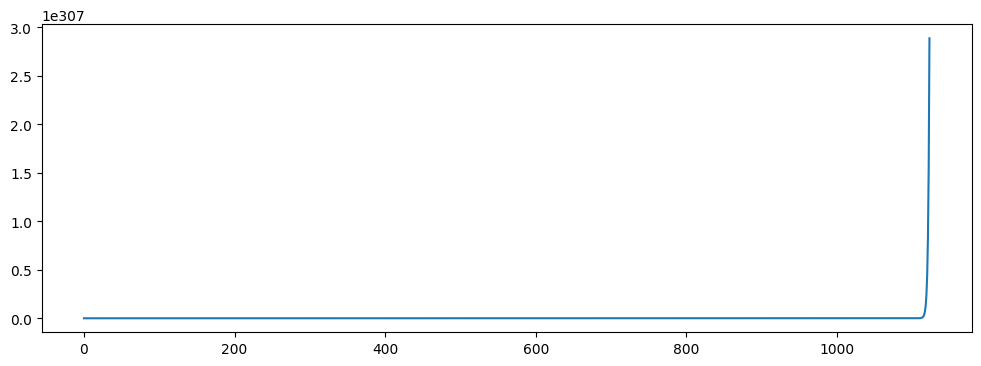

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.plot(J_hist)